<a href="https://colab.research.google.com/github/Ephraimosse9/Pytorch-course-on-UDEMY--Notes-and-Codes/blob/main/02_neural_network_classification_with_pytorch_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PYTORCH NEURAL NETWORK CLASSIFICATION EXERCISES

##1. Make a binary classification dataset with Scikit-Learn's make_moons() function.
For consistency, the dataset should have 1000 samples and a random_state=42.

Turn the data into PyTorch tensors. Split the data into training and test sets using train_test_split with 80% training and 20% testing.


In [48]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [49]:
X, Y = make_moons(1000, noise= 0.1, random_state=42)
X= torch.from_numpy(X).type(torch.float)
Y= torch.from_numpy(Y).type(torch.float)


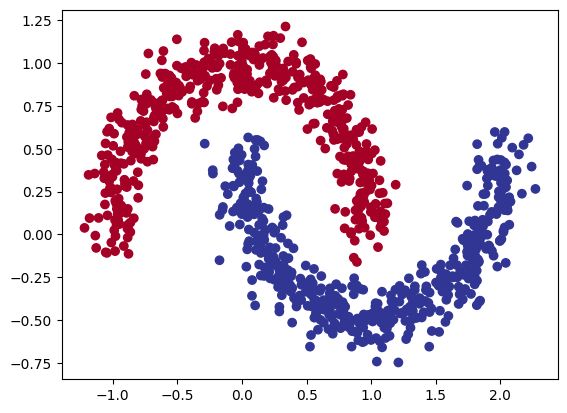

In [50]:
plt.scatter(X[:,0], X[:,1], c=Y, cmap= plt.cm.RdYlBu)

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.8, random_state=42)

##2. Build a model by subclassing nn.Module that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [63]:
class MoonModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.Layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10, out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10, out_features=1)
        )
  def forward(self,x):
      return self.Layers(x)

model_0 = MoonModel()


##3.Setup a binary classification compatible loss function and optimizer to use when training the model.

In [64]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params= model_0.parameters(), lr=0.1)

##4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
To measure model accuracy, you can create your own accuracy function or use the accuracy function in TorchMetrics.
Train the model for long enough for it to reach over 96% accuracy.
The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [65]:
import torchmetrics
from torchmetrics import Accuracy

accuracy_fn = Accuracy(task="BINARY", num_classes=2)

In [66]:
epochs = 1000
for epoch in range(epochs):
  model_0.train()
  y_logits = model_0(X_train).squeeze()
  y_pred_train = torch.round(torch.sigmoid(y_logits))
  loss_train = loss_fn(y_logits, Y_train)
  accuracy_train = accuracy_fn(y_pred_train, Y_train) * 100
  optimizer.zero_grad()
  loss_train.backward()
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    x_logits = model_0(X_test).squeeze()
    y_pred_test = torch.round(torch.sigmoid(x_logits))
    loss_test = loss_fn(x_logits, Y_test)
    accuracy_test = accuracy_fn(y_pred_test, Y_test) * 100

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} || Training Loss: {loss_train: .5f}, Training Accuracy: {accuracy_train: .2f}% || Testing Loss: {loss_test: .5f}, Test Accuracy: {accuracy_test: .2f}%")

Epoch: 0 || Training Loss:  0.70414, Training Accuracy:  50.00% || Testing Loss:  0.70265, Test Accuracy:  50.00%
Epoch: 100 || Training Loss:  0.42912, Training Accuracy:  84.88% || Testing Loss:  0.43991, Test Accuracy:  81.50%
Epoch: 200 || Training Loss:  0.27119, Training Accuracy:  87.75% || Testing Loss:  0.27397, Test Accuracy:  86.50%
Epoch: 300 || Training Loss:  0.23172, Training Accuracy:  89.50% || Testing Loss:  0.22668, Test Accuracy:  91.00%
Epoch: 400 || Training Loss:  0.20576, Training Accuracy:  90.62% || Testing Loss:  0.19770, Test Accuracy:  92.00%
Epoch: 500 || Training Loss:  0.17567, Training Accuracy:  92.12% || Testing Loss:  0.16628, Test Accuracy:  92.50%
Epoch: 600 || Training Loss:  0.14022, Training Accuracy:  93.88% || Testing Loss:  0.13034, Test Accuracy:  94.00%
Epoch: 700 || Training Loss:  0.10352, Training Accuracy:  96.25% || Testing Loss:  0.09360, Test Accuracy:  97.50%
Epoch: 800 || Training Loss:  0.07286, Training Accuracy:  97.88% || Testi

##5. Make predictions with your trained model and plot them using the plot_decision_boundary() function created in this notebook.

In [67]:
  with torch.inference_mode():
    x_logits = model_0(X_test).squeeze()
    y_pred_test = torch.round(torch.sigmoid(x_logits))
y_pred_test[:5] == Y_test[:5]

tensor([True, True, True, True, True])

In [68]:
import requests
import pathlib
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

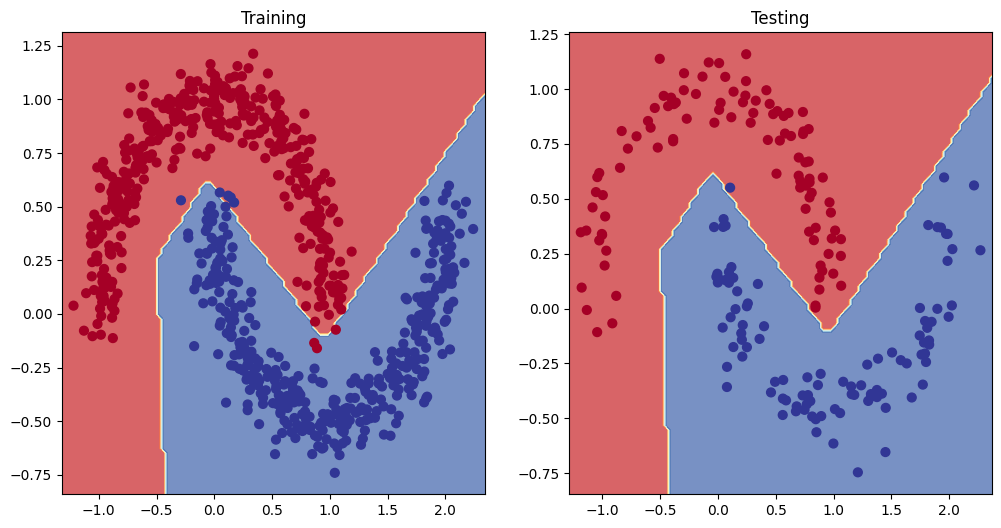

In [69]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training")
plot_decision_boundary(model_0, X_train, Y_train)

plt.subplot(1,2,2)
plt.title("Testing")
plot_decision_boundary(model_0, X_test, Y_test)

##6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.


In [79]:
A = torch.arange(-10,10,0.1)
def Tanh(z):
  act = (torch.exp(z)-torch.exp(-z))/(torch.exp(z)+torch.exp(-z))
  return act

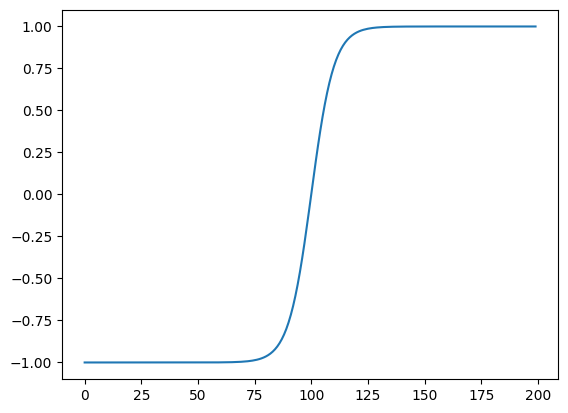

In [80]:
plt.plot(Tanh(A))

##7. Create a multi-class dataset using the spirals data creation function from CS231n (see below for the code).
Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like).
Plot the decision boundaries on the spirals dataset from your model predictions, the plot_decision_boundary() function should work for this dataset too.

In [201]:

def spiral():
  N = 1000 # number of points per class
  D = 2 # dimensionality
  K = 3 # number of classes

  X = np.zeros((N*K,D)) # data matrix (each row = single example)
  y = np.zeros(N*K, dtype='uint8') # class labels

  for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
  return X, y

In [230]:
A, B = spiral()
A= torch.from_numpy(A).type(torch.float)
torch.manual_seed(42)
B= torch.from_numpy(B).type(torch.float)
torch.manual_seed(42)
A[:5], B[:5]

(tensor([[-0.0000,  0.0000],
         [-0.0003,  0.0010],
         [ 0.0008,  0.0018],
         [-0.0005,  0.0030],
         [ 0.0009,  0.0039]]),
 tensor([0., 0., 0., 0., 0.]))

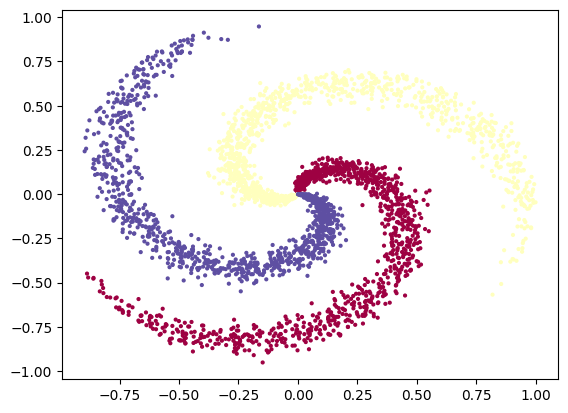

In [231]:
plt.scatter(A[:, 0], A[:, 1], c=B, s=4, cmap=plt.cm.Spectral)
plt.show()

In [239]:
A_train, A_test, B_train, B_test = train_test_split(A,B, random_state=42)
A_train[:5], B_train[:5]

(tensor([[-0.6316,  0.6729],
         [ 0.3097,  0.1412],
         [-0.0991, -0.0010],
         [-0.0366,  0.5423],
         [ 0.1701, -0.7292]]),
 tensor([2., 0., 1., 1., 0.]))

In [254]:
device = "cuda" if torch.cuda.is_available() else "cpu"
class SpiralModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.Layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=128),
        nn.ReLU(),
        nn.Linear(in_features=128, out_features=256),
        nn.ReLU(),
        nn.Linear(in_features=256, out_features=3)
        )
  def forward(self,x):
    return self.Layers(x)

model_1 = SpiralModel()

In [255]:
loss_fn_1 = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_1.parameters(), lr=0.1)
accuracy_fn1 = Accuracy(task="MULTICLASS", num_classes=3)

In [256]:
epochsz = 1000
for epoch in range(epochsz):
  model_1.train()
  y_logits = model_1(A_train).squeeze()
  y_pred_train = torch.argmax(torch.softmax(y_logits, dim=1), dim =1)
  loss_train = loss_fn_1(y_logits, B_train.long())
  accuracy_train = accuracy_fn1(y_pred_train, B_train) * 100
  optimizer.zero_grad()
  loss_train.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    x_logits = model_1(A_test).squeeze()
    y_pred_test = torch.argmax(torch.softmax(x_logits, dim=1), dim =1)
    loss_test = loss_fn_1(x_logits, B_test.long())
    accuracy_test = accuracy_fn1(y_pred_test, B_test) * 100

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} || Training Loss: {loss_train: .5f}, Training Accuracy: {accuracy_train: .2f}% || Testing Loss: {loss_test: .5f}, Test Accuracy: {accuracy_test: .2f}%")

Epoch: 0 || Training Loss:  1.09297, Training Accuracy:  32.80% || Testing Loss:  1.08129, Test Accuracy:  60.27%
Epoch: 100 || Training Loss:  0.65255, Training Accuracy:  60.31% || Testing Loss:  0.64452, Test Accuracy:  60.00%
Epoch: 200 || Training Loss:  0.51466, Training Accuracy:  71.33% || Testing Loss:  0.50106, Test Accuracy:  72.53%
Epoch: 300 || Training Loss:  0.37659, Training Accuracy:  82.98% || Testing Loss:  0.35772, Test Accuracy:  84.53%
Epoch: 400 || Training Loss:  0.27717, Training Accuracy:  89.78% || Testing Loss:  0.25600, Test Accuracy:  90.40%
Epoch: 500 || Training Loss:  0.21507, Training Accuracy:  93.20% || Testing Loss:  0.19398, Test Accuracy:  94.13%
Epoch: 600 || Training Loss:  0.17414, Training Accuracy:  95.07% || Testing Loss:  0.15402, Test Accuracy:  96.13%
Epoch: 700 || Training Loss:  0.14536, Training Accuracy:  96.04% || Testing Loss:  0.12646, Test Accuracy:  97.73%
Epoch: 800 || Training Loss:  0.12424, Training Accuracy:  96.80% || Testi

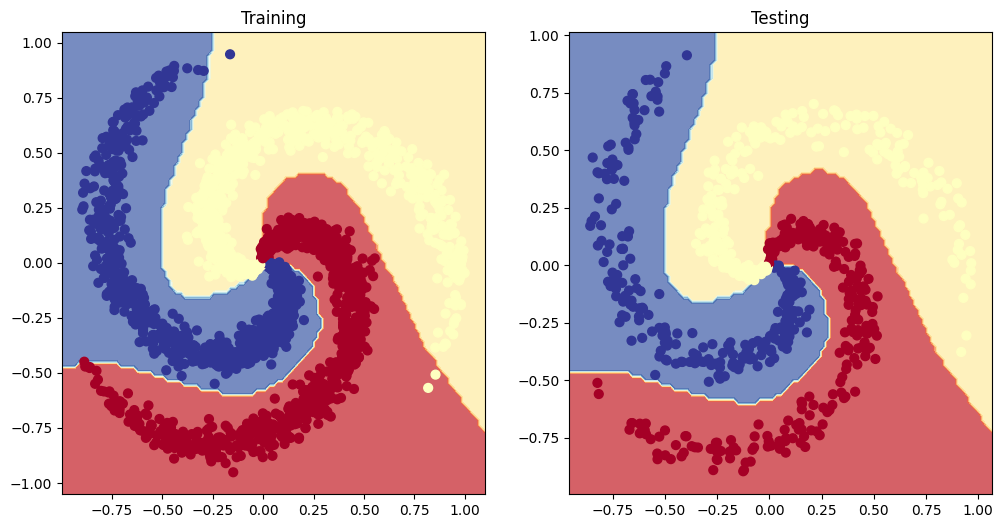

In [257]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training")
plot_decision_boundary(model_1, A_train, B_train)

plt.subplot(1,2,2)
plt.title("Testing")
plot_decision_boundary(model_1, A_test, B_test)